# TP3 - exercice 2 : SVMs non linéaires et fonctions noyaux

Dans cet exercice nous verrons comment construire des SVM non linéaires en utilisant des fonctions noyaux ('kernels'). 
Nous travaillerons toujours à partir de la classe [**SVC**](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), et apprendrons à manipuler le noyau RBF (ou gaussien).

Nous travaillerons toujours à partir du jeu de données simulées **moon**, que l'on peut générer à partir de la fonction [make_moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) du module **datasets** de scikit-learn. 

Le jeu de données **moons** étant en 2D, cet exercice sera également l'occasion d'apprendre à représenter les frontières de décision du modèle.

## Question 1.  Générer un jeu de données de taille 300 avec un niveau de bruit égal à 0.3 grâce à la fonction [make_moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) et le réprésenter.
* on pourra utiliser la fonction **scatter** du package *MatplotLib* pour représenter les points avec un code couleur reflétant leur catégorie.

In [1]:
# general imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

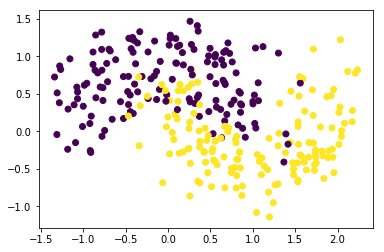

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(300, noise = 0.3, random_state=27)
# plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

## Question 2.  Le code ci-dessous permet de représenter la frontière de décision du modèle qu'on lui donne en paramètre. L'utiliser pour représenter les frontières que l'on obtient avec un modèle SVM construit à partir d'un noyau linéaire ou d'un noyau à base radiale.
* on spéficie le noyau à utiliser via l'argument **kernel** du constructeur de la classe **SVC**, que l'on mettra ici à *kernel='linear'* ou *kernel='rbf'.
* on conservera les autres paramètres par défaut.

In [3]:
def show_model_decision(X, y, model) : 
    # define (x,y) grid
    x0_min = np.min(X[:,0])
    x0_max = np.max(X[:,0])
    x1_min = np.min(X[:,1])
    x1_max = np.max(X[:,1])
    xx, yy = np.meshgrid(np.linspace(x0_min-1, x0_max+1, 200), np.linspace(x1_min-1, x1_max+1, 200))
    # evaluate decision function in a grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # the ravel() function converts a 2D array in 1D
    Z = Z.reshape(xx.shape)
    # plot model score
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.colorbar()
    # plot classification boundary
    plt.contour(xx, yy, Z, 0, colors = 'k')
    # show data points
    plt.scatter(X[:,0], X[:,1], c = y)


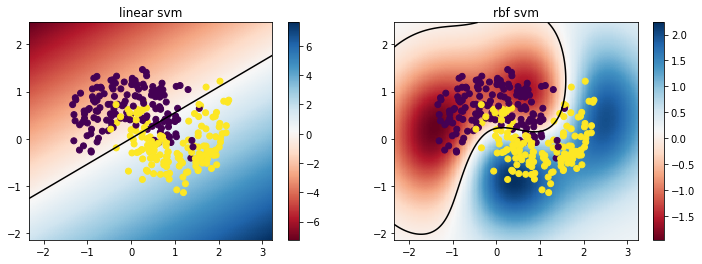

In [4]:
from sklearn.svm import SVC
plt.figure(figsize=(12,4))
# linear model
svm_lin = SVC(kernel = 'linear')
svm_lin.fit(X, y)
plt.subplot(1,2,1)
show_model_decision(X,y,svm_lin)
plt.title('linear svm')
# rbf model
svm_rbf = SVC(kernel = 'rbf')
svm_rbf.fit(X, y)
plt.subplot(1,2,2)
show_model_decision(X,y,svm_rbf)
plt.title('rbf svm')
# show figure
plt.show()

## Question 3.  Optimiser par validation croisée le paramètre $C$ du modèle à noyau linéaire en utilisant la classe *GridSearchCV*. Représenter le modèle obtenu.
* on rappelle qu'à l'issue de la procédure de validation, le modèle correspondant à la meilleure configuration (et appris sur l'intégralité des données d'apprentissage) est disponible dans le champ **best\_estimator\_** de l'objet **GridSearchCV**.
* on pourra prendre $C \in [10^{-3},10^3]$ avec des valeurs réparties de manière logarithmique.

The best parameters are {'C': 0.10000000000000001} with a score of 0.84


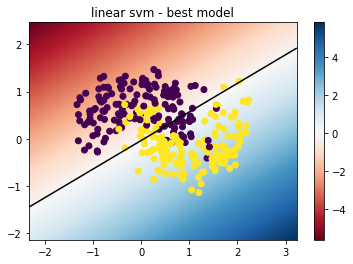

In [5]:
# instantiate model
svm_lin = SVC(kernel = 'linear')
# define grid of parameter
C_grid = np.logspace(-3,3, 10)
param_grid = {'C' : C_grid}
# optimise parameter
from sklearn.model_selection import GridSearchCV
grid_search_lin = GridSearchCV(svm_lin, param_grid, cv= 10)
grid_search_lin.fit(X,y)
# show results
print("The best parameters are %s with a score of %0.2f"
     % (grid_search_lin.best_params_, grid_search_lin.best_score_))
# show decision boundary
show_model_decision(X, y, grid_search_lin.best_estimator_)
plt.title('linear svm - best model')
# show figure
plt.show()

## Question 4.  Faire de même pour le modèle SVM non linéaire basé sur noyau radial, en optimisant cette fois ci le paramètre $C$ et le paramètre $\gamma$ du noyau. Quel noyau semble le plus adapté au problème ? Est-ce surprenant ?
* on pourra prendre comme précédemment $C \in [10^{-3},10^3]$ et $\gamma \in [0.1, 2]$ (en prenant $\gamma$ sur une grille linéaire).

The best parameters are {'C': 0.46415888336127775, 'gamma': 2} with a score of 0.90


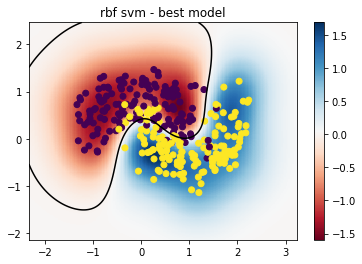

In [6]:
# instantiate model
svm_rbf = SVC(kernel = 'rbf')
# define grid of parameter
C_grid = np.logspace(-3,3, 10)
gamma_grid = [0.1, 0.25, 0.5, 0.75, 1, 2]
param_grid = {'C' : C_grid,
             'gamma' : gamma_grid}
# optimise parameter
grid_search_rbf = GridSearchCV(svm_rbf, param_grid, cv= 10)
grid_search_rbf.fit(X,y)
# show results
print("The best parameters are %s with a score of %0.2f"
     % (grid_search_rbf.best_params_, grid_search_rbf.best_score_))
# show decision boundary
show_model_decision(X, y, grid_search_rbf.best_estimator_)
plt.title('rbf svm - best model')
# show figure
plt.show()

## Question 5.  Reproduire cette analyse en optimisant à la fois le choix du noyau et de leurs paramètres dans une même procédure de validation croisée (i.e., dans un seul appel à la classe *GridSearchCV*). Obtenez-vous bien les mêmes résultats ? Qu'est ce qui pourrait expliquer des résultats (légèrement) différents ?

The best parameters are {'C': 0.46415888336127775, 'gamma': 2, 'kernel': 'rbf'} with a score of 0.90


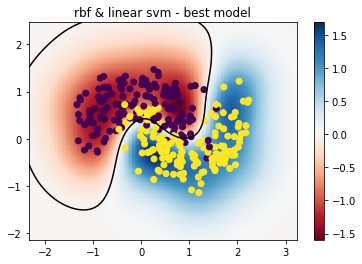

In [7]:
# instantiate model
svm = SVC()
# define grid of parameter
C_grid = np.logspace(-3,3, 10)
param_grid = [
    {'kernel' : ['linear'], 'C' : C_grid},
    {'kernel' : ['rbf'], 'C' : C_grid, 'gamma' : gamma_grid}
]
# optimise parameter
grid_search = GridSearchCV(svm, param_grid, cv= 10)
grid_search.fit(X,y)
# show results
print("The best parameters are %s with a score of %0.2f"
     % (grid_search.best_params_, grid_search.best_score_))
# show decision boundary
show_model_decision(X, y, grid_search.best_estimator_)
plt.title('rbf & linear svm - best model')
# show figure
plt.show()

## Question 6 - pour aller plus loin.  Reproduire cette dernière analyse, en intégrant une étape de standardisation des descripteurs dans le processus de validation, via un "pipeline".

The best parameters are {'svm__C': 215.44346900318823, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'} with a score of 0.91


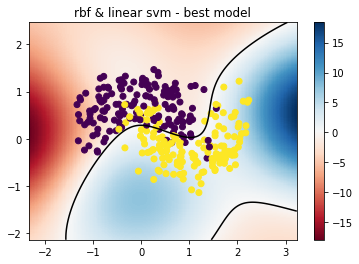

In [8]:
# define pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# define grid of parameter
C_grid = np.logspace(-3,3, 10)
param_grid = [
    {'svm__kernel' : ['linear'], 'svm__C' : C_grid},
    {'svm__kernel' : ['rbf'], 'svm__C' : C_grid, 'svm__gamma' : gamma_grid}
]
# optimise parameter
grid_search = GridSearchCV(svm_pipe, param_grid, cv= 10)
grid_search.fit(X,y)
# show results
print("The best parameters are %s with a score of %0.2f"
     % (grid_search.best_params_, grid_search.best_score_))
# show decision boundary
show_model_decision(X, y, grid_search.best_estimator_)
plt.title('rbf & linear svm - best model')
# show figure
plt.show()